## Billionaires - 2021 Analysis

<img src="https://i0.wp.com/bitcoinke.io/wp-content/uploads/2021/04/Forbest-Billionaire-List-2021.jpg">

#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import Image
import os

## Data Preparation and Cleaning




In [2]:
df = pd.read_csv("Billionaire.csv")

### Exploring Data

In [3]:
df.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [4]:
df.tail()

,Name,NetWorth,Country,Source,Rank,Age,Industry
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified
2754,Zhou Wei family,$1 B,China,Software,2674,54.0,Technology


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


In [142]:
df.describe()

,Rank,Age,NetWorth_In_Billion
count,2755.000000,2676.000000,2755.000000
mean,1345.663521,63.113602,4.749220
std,772.669811,13.445153,9.615358
min,1.000000,18.000000,1.000000
25%,680.000000,54.000000,1.500000
50%,1362.000000,63.000000,2.300000
75%,2035.000000,73.000000,4.200000
max,2674.000000,99.000000,177.000000


In [6]:
df.columns

Index(['Name', 'NetWorth', 'Country', 'Source', 'Rank', 'Age', 'Industry'], dtype='object')

In [7]:
df["NetWorth_In_Billion"] = df["NetWorth"].replace(
                                {'\$': '', 'B': ''}, regex=True).astype(float)

#### Check if all elements in a row and column are missing values

In [8]:
df.isna().sum()

Name                    0
NetWorth                0
Country                 0
Source                  0
Rank                    0
Age                    79
Industry                0
NetWorth_In_Billion     0
dtype: int64

#### Get the column "Rank" to first index

In [9]:
col = df.pop('Rank')
df.insert(0, col.name, col) 

### Top 20 countries  with highest NetWorth

In [10]:
all_countries = df.groupby(["Country"]).sum()

In [11]:
countries =all_countries["NetWorth_In_Billion"].sort_values()
top_20_countries = countries[-20:]
top_20_countries = top_20_countries[::-1]

Text(0.5, 0, 'Countries')

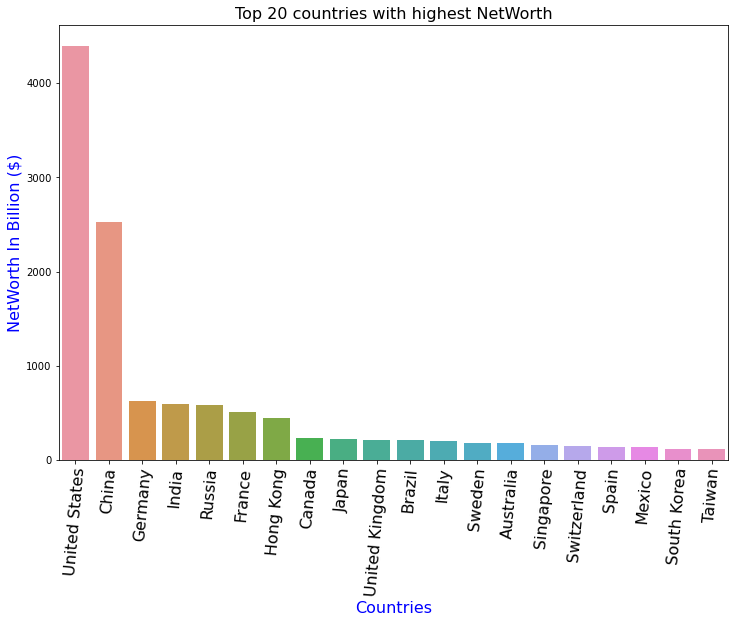

In [12]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=85, size=16)
plt.title('Top 20 countries with highest NetWorth', size=16)
sns.barplot(x=top_20_countries.index, y=top_20_countries.values);

plt.ylabel('NetWorth In Billion ($)', size=16, c="b")
plt.xlabel('Countries', size=16, c="b")

### Top 20 billionaires  with highest NetWorth 


In [13]:
all_billionaires = df.groupby(["Name"]).sum()

In [14]:
top_20_billionaires = all_billionaires.sort_values(by="NetWorth_In_Billion",
                                                   ascending=False)
top_20_billionaires = top_20_billionaires[:20]

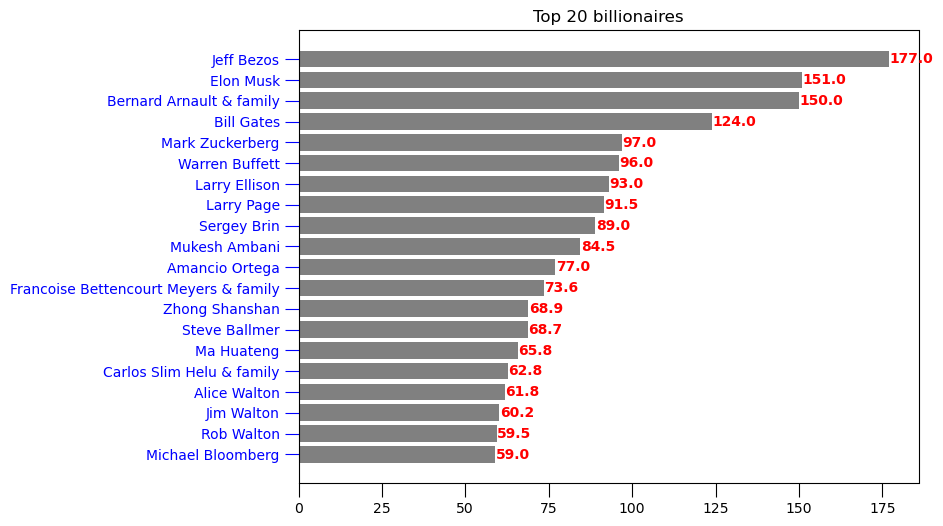

In [15]:
billionares_name = top_20_billionaires.NetWorth_In_Billion.index
networth = top_20_billionaires.NetWorth_In_Billion.values

plt.figure(figsize=(8,6),dpi=100)
plt.title("Top 20 billionaires")
plt.barh(y=billionares_name, width=networth, align='center',color="grey",)

#Set tick colors:
plt.gca().invert_yaxis() # labels read top-to-bottom
plt.tick_params(axis='x', colors='black',size=10)
plt.tick_params(axis='y', colors='blue',size=10,)

# display the value of the bar on each bar 
for i, v in enumerate(networth):
    plt.text(v + 0.1, i + 0.2, str(v), color='r', fontweight='bold')
plt.show()

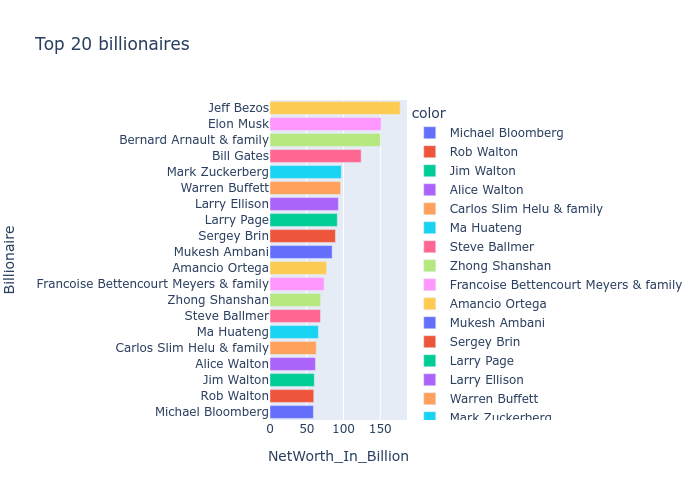

In [243]:
h_bar = px.bar(x=networth[::-1],
               y=billionares_name[::-1],
               orientation='h',
               color=billionares_name[::-1],
               title="Top 20 billionaires")

h_bar.update_layout(xaxis_title="NetWorth_In_Billion", 
                    yaxis_title='Billionaire',
                    coloraxis_showscale=False)
# h_bar.show()
h_bar.write_image("fig1.png")
Image(filename="fig1.png") 

### industries with lowest number of billionaires

In [19]:
all_Industry = df.groupby("Industry")['NetWorth_In_Billion'].agg(
                ['count',"sum"]).sort_values(by="count",ascending=False)
lowest_industries = all_Industry.sort_values(by="count",ascending=True)[:8]

<AxesSubplot:title={'center':'industries with lowest number of billionaires'}, xlabel='Industry', ylabel='Number of billionaires'>

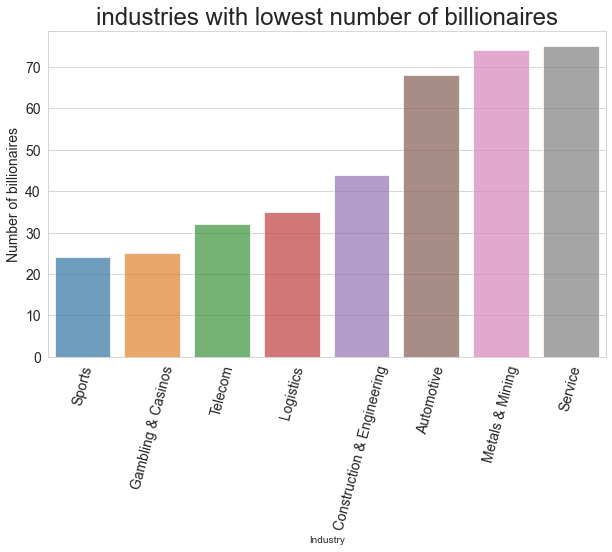

In [21]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=75)
plt.title('industries with lowest number of billionaires',fontsize=24)
plt.ylabel('Number of billionaires',fontsize=14)
plt.tick_params(axis='both',labelsize=14)
sns.barplot(y=lowest_industries['count'].values,
            x=lowest_industries['count'].index, alpha=.7)


### industries with heighest number of billionaires

In [22]:
heighest_10_industries = all_Industry.sort_values(by="count",ascending=False)[:10]

<AxesSubplot:title={'center':'industries with heighest number of billionaires'}, xlabel='Industry', ylabel='Number of billionaires'>

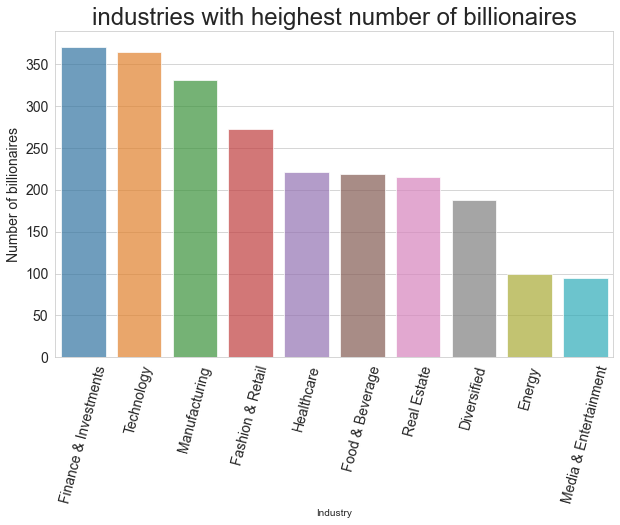

In [23]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=75)
plt.title('industries with heighest number of billionaires',fontsize=24)
plt.ylabel('Number of billionaires',fontsize=14)
plt.tick_params(axis='both',labelsize=14)
sns.barplot(y=heighest_10_industries['count'].values,
            x=heighest_10_industries['count'].index, alpha=.7)

##### If you want to become a billionaire you should probably start business in Finance or Technology.

###  Which Catagories(source) have highest Count of Billionaires?

In [24]:
cata_df=df.groupby('Source')['NetWorth_In_Billion'].agg(
                                        ["sum", "min", "max",'count','mean'])
cata_df=cata_df.sort_values(by='sum',ascending=False)
cata_df=cata_df[cata_df['count']>5]

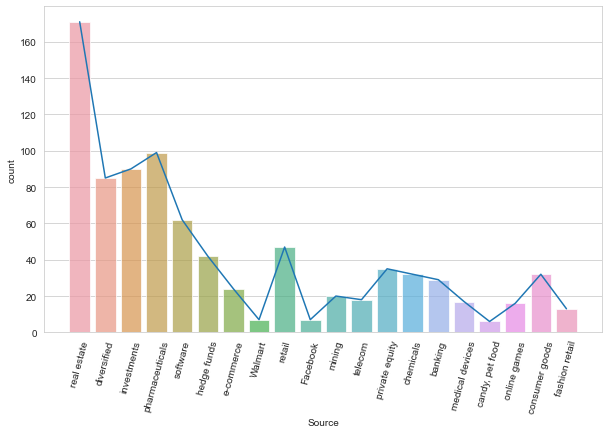

In [25]:
z = cata_df
plt.figure(figsize=(10,6))
plt.xticks(rotation=75)
sns.barplot(y=z['count'][:20], x=z.index[:20],alpha=.7);
plt.plot(z.index[:20],z['count'][:20]);

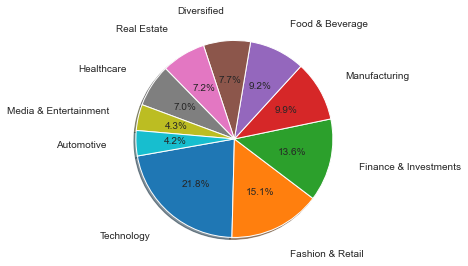

In [241]:
k=df.groupby("Industry").sum().sort_values("NetWorth_In_Billion", ascending=False)
fig1, ax1 = plt.subplots()

ax1.pie(k.NetWorth_In_Billion.values[:10], explode=None,
        pctdistance=0.6,labeldistance=1.3,
        labels=k.NetWorth_In_Billion.index[:10], autopct='%0.1f%%',
        shadow=True, startangle=190)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Top 20 Countries  with highest number of billionaires


In [26]:
top20 = df.groupby('Country')['NetWorth_In_Billion'].agg(['count'])
top20Country_with_billionaires = top20[top20["count"]>20].sort_values(
                                            "count",ascending=False)[:20]

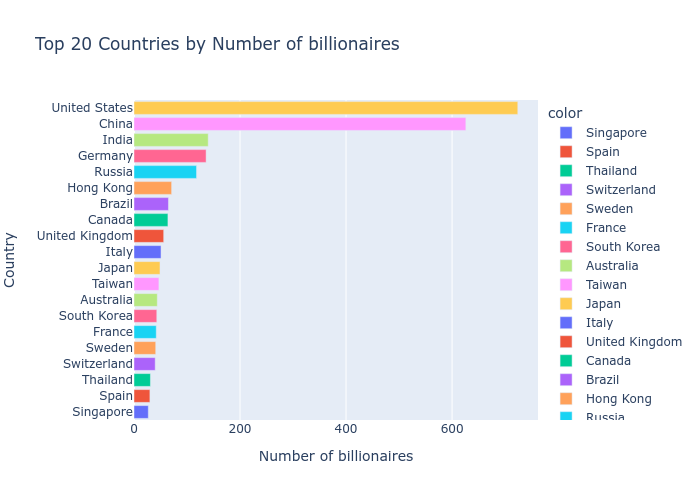

In [244]:
data=top20Country_with_billionaires
h_bar = px.bar(x=data["count"].values[::-1],
               y=data.index[::-1],
               orientation='h',
               color=data["count"].index[::-1],
               title="Top 20 Countries by Number of billionaires")

h_bar.update_layout(xaxis_title='Number of billionaires', 
                    yaxis_title='Country',
                    coloraxis_showscale=True)
# h_bar.show()
h_bar.write_image("fig2.png")
Image(filename="fig2.png") 

### 20 countries with lowest number of billionaires

In [28]:
lowest20 = df.groupby('Country')['NetWorth_In_Billion'].agg(['count'])

In [29]:
lowest20 = lowest20.sort_values("count",ascending=True)[:20]

/home/ousman/anaconda3/lib/python3.8/site-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



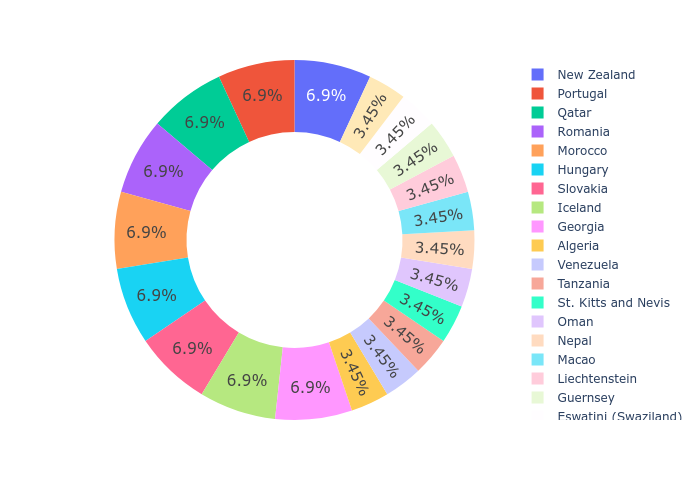

In [247]:
fig_hole = px.pie(labels=lowest20["count"].index,
                 values=lowest20["count"].values,
                 names=lowest20["count"].index,
                 hole=0.6)

fig_hole.update_traces(textposition='inside', textfont_size=15, textinfo='percent')


# h_bar.show()
fig_hole.write_image("fig3.png")
Image(filename="fig3.png") 

#### Which country has most Billionares in Realestate?

In [31]:
realestate=df[df["Source"]=="real estate"].groupby("Country")['Source'].agg(['count'])
realestate = realestate[realestate["count"] > 1]

<AxesSubplot:xlabel='Country'>

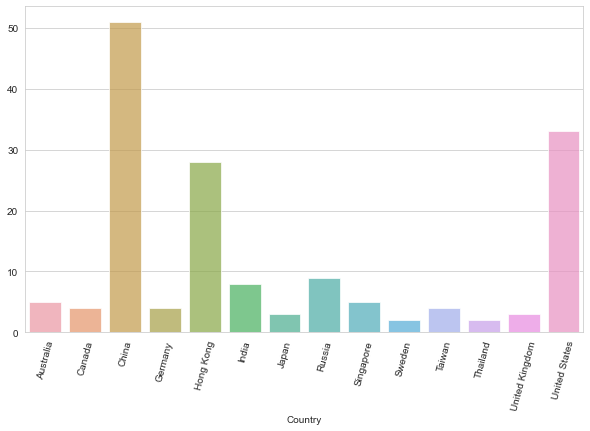

In [32]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=75)
sns.barplot(y=realestate['count'].values, x=realestate['count'].index[:20],alpha=.7)

### Top 20 billionaires:
#### What they do?  In wich industry they work? Where are they from?

In [33]:
k=df[["Name","Country", "NetWorth_In_Billion","Industry"]
  ].sort_values("NetWorth_In_Billion",ascending=False)[:20]

In [34]:
l=k.groupby("Country")['Industry'].agg(['count']).sort_values(
                                                    by='count',ascending=False)

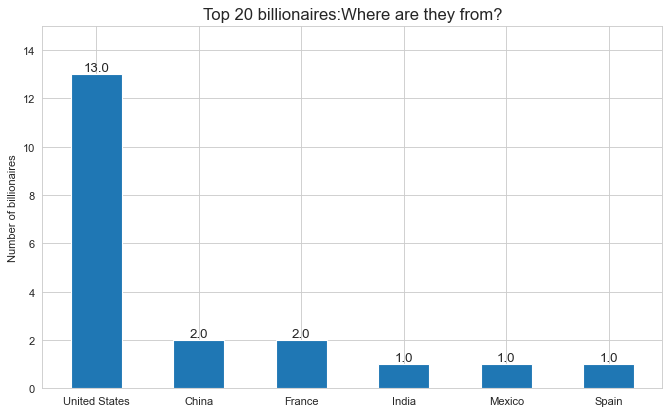

In [49]:
# Plot Bars
plt.figure(figsize=(10,6), dpi= 80)
plt.bar(l["count"].index, l["count"], width=.5)
for i, val in enumerate(l['count'].values):
    plt.text(i, val, float(val), horizontalalignment='center',
             verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
# Decoration
plt.title("Top 20 billionaires:Where are they from?", fontsize=15)
plt.ylabel('Number of billionaires')
plt.ylim(0, 15)
plt.show()

In [92]:
k=k[["Age","NetWorth_In_Billion","Country"]]

<BarContainer object of 10 artists>

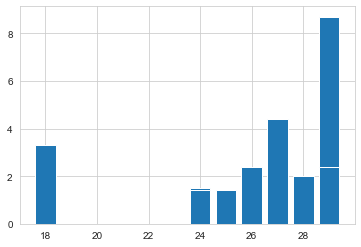

In [139]:
plt.bar(k.Age, k.NetWorth_In_Billion)

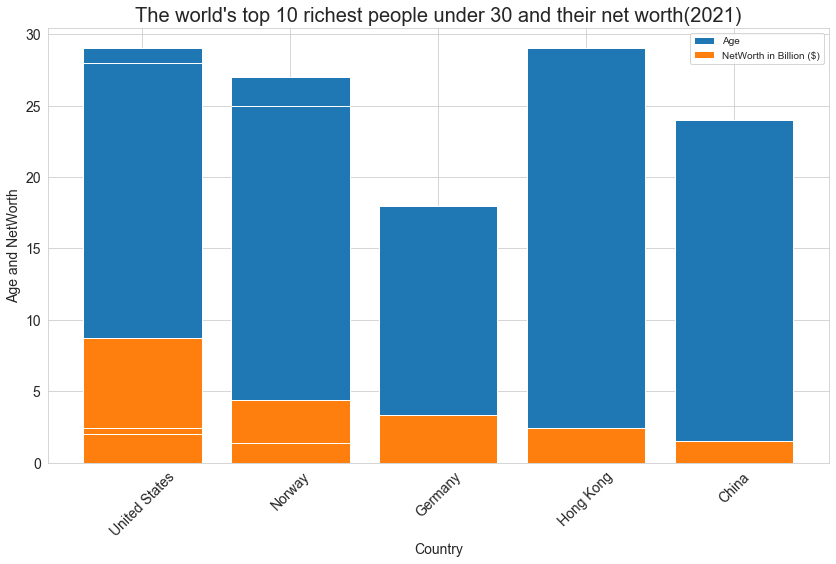

In [138]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Age and NetWorth', fontsize=14)
plt.xlabel('Country', fontsize=14)
plt.title("The world's top 10 richest people under 30 and their net worth(2021)"
          ,fontsize=20)
plt.bar(k.Country, k.Age)
plt.bar(k.Country, k.NetWorth_In_Billion)
plt.legend(["Age", "NetWorth in Billion ($)"])

### Grouped billionaire by age

<AxesSubplot:>

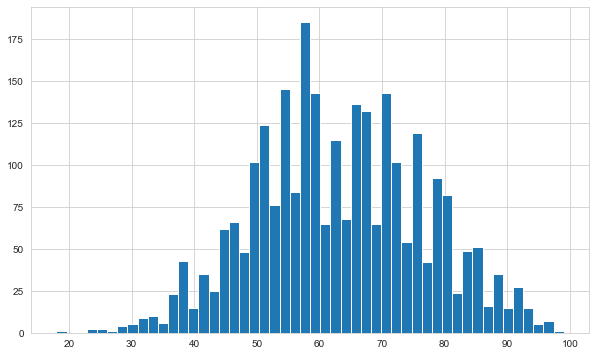

In [179]:
df["Age"].hist(bins=50, figsize=(10,6))

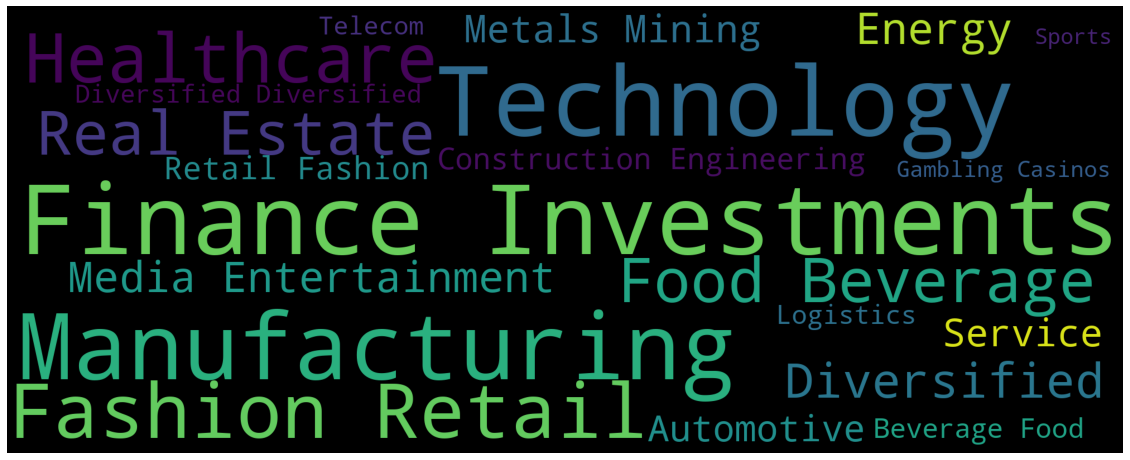

In [168]:
data = df["Industry"]
plt.figure(figsize= (20,20))
words = " ".join(data.values)
output = WordCloud(width = 2000, height = 800, background_color ="black",
                              min_font_size = 10).generate(words)
plt.imshow(output)
plt.axis("off") 
plt.show()